In [4]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV


# PART 1 
# Question 1. Data Understanding [ 5 marks ]:
# a. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]
# b. Print Shape and columns of all the 3 DataFrames. [1 Mark]
# c. Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]
# d. Print DataTypes of all the 3 DataFrames. [1 Mark] 
# e. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. [1 Mark]

In [2]:
 
#  a. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]


data1 = pd.read_csv('Normal.csv')
data1.head()


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [3]:
data2 = pd.read_csv('Type_H.csv')
data2.head()


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [4]:
data3 = pd.read_csv('Type_S.csv')
data3.head()


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [5]:
# b. Print Shape and columns of all the 3 DataFrames. [1 Mark]
# Get info of the dataframe columns
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [7]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


In [8]:
# Printing shape of all 3 data sets
data1.shape

(100, 7)

In [9]:
data2.shape

(60, 7)

In [10]:
data3.shape

(150, 7)

In [12]:
# c. Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]
# 
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)

# first Comparing data1 and data2
set(df1.columns).intersection(set(df2.columns))

# It will return the columns thoses are same in both data sets


{'Class',
 'L_angle',
 'P_incidence',
 'P_radius',
 'P_tilt',
 'S_Degree',
 'S_slope'}

As both dataframe has same number of columns and columns having same name. We will get all column name in output.

In [14]:
# now comparing data2 and data3
set(df2.columns).intersection(set(df3.columns))

{'Class',
 'L_angle',
 'P_incidence',
 'P_radius',
 'P_tilt',
 'S_Degree',
 'S_slope'}

As both dataframe has same number of columns and columns having same name. We will get all column name in output.

In [15]:
# lastly comparing data1 and data3
set(df1.columns).intersection(set(df3.columns))

{'Class',
 'L_angle',
 'P_incidence',
 'P_radius',
 'P_tilt',
 'S_Degree',
 'S_slope'}

As both dataframe has same number of columns and columns having same name. We will get all column name in output.

In [16]:
# d. Print DataTypes of all the 3 DataFrames. [1 Mark]
datatypes1 = data1.dtypes
datatypes1

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [17]:
datatypes2 = data1.dtypes
datatypes2

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [18]:
datatypes3 = data1.dtypes
datatypes3

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [19]:
# Checking null values of all three datasets
data1.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [20]:
data2.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [21]:
data3.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

# e. Observe and share variation in ‘Class’ feature of all the 3 DataFrames. [1 Mark]

1) I have observed that P_incidence for class 'Normal' does not present in P_incidence of Type_H as well as Type_S.
Also 'Class' columns contains come entries as Normal and some are missspelled as Nrmal. Class has datatype object for all 
the three dataframes.

2) P_incidemce for class 'Type_S' does not present in P_incidence of Type_H as well as Normal. In 'Class' column contains 
some entries as Type_S and some are missspelled as tp_s. Class has datatype object for all the three dataframes.

3)2) P_incidemce for class 'Type_H' does not present in P_incidence of Type_S as well as Normal. In 'Class' column contains 
some entries as Type_H and some are missspelled as type_h. Class has datatype object for all the three dataframes.


# Question 2. Data Preparation and Exploration: [5 Marks]
# a. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks]
#       For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’
# b. Combine all the 3 DataFrames to form a single DataFrame [1 Marks]
#       Checkpoint: Expected Output shape = (310,7)
# c. Print 5 random samples of this DataFrame [1 Marks]
# d. Print Feature-wise percentage of Null values. [1 Mark]
# e. Check 5-point summary of the new DataFrame. [1 Mark]

In [22]:
# a. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks]
#       For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’

# First replacing Nrmal to Normal

df1_new = df1.replace(to_replace ="Nrmal",value ="Normal")

In [23]:
df1_new.shape

(100, 7)

In [24]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [25]:
df2_new = df2.replace(to_replace ="type_h",value ="Type_H")

In [26]:
df2_new.shape

(60, 7)

In [27]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [28]:
df3_new = df3.replace(to_replace ="tp_s",value ="Type_S")

In [29]:
df3_new.shape

(150, 7)

In [30]:
df3_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


In [31]:
# b. Combine all the 3 DataFrames to form a single DataFrame [1 Marks]
#    Checkpoint: Expected Output shape = (310,7)

# First Combining df1 and df2

df12_concat = pd.concat([df1_new, df2_new])

df12_concat.shape

(160, 7)

In [32]:
df12_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  160 non-null    float64
 1   P_tilt       160 non-null    float64
 2   L_angle      160 non-null    float64
 3   S_slope      160 non-null    float64
 4   P_radius     160 non-null    float64
 5   S_Degree     160 non-null    float64
 6   Class        160 non-null    object 
dtypes: float64(6), object(1)
memory usage: 10.0+ KB


In [33]:
# Now combining result of df1 & df2 to df3 to get df_new

df_new = pd.concat([df12_concat , df3])

df_new.shape

(310, 7)

In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [35]:
# c. Print 5 random samples of this DataFrame [1 Marks]

df_new.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
55,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,Type_H
44,72.955644,19.576971,61.007071,53.378673,111.234047,0.813491,Normal
75,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,Type_S
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Type_H
18,38.046551,8.301669,26.236830,29.744881,123.803413,3.885773,Normal


In [36]:
# d. Print Feature-wise percentage of Null values. [1 Mark]

percent_missing = df_new.isnull().sum() * 100 / len(df_new)

percent_missing

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

In [37]:
df_new.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [38]:
# e. Check 5-point summary of the new DataFrame. [1 Mark]

df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


# Question 3. Data Analysis: [10 Marks]
# a. Visualize a heatmap to understand correlation between all features [2 Marks]
# b. Share insights on correlation. [2 Marks]
#    i. Features having stronger correlation with correlation value.
#    ii. Features having weaker correlation with correlation value.
# c. Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]
# d. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]
# e. Visualize a boxplot to check distribution of the features and share insights. [2 Marks]

In [40]:
 # a. Visualize a heatmap to understand correlation between all features [2 Marks]
    
# we are using dataframe df_new = Df1+Df2+Df3

df_new.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [41]:
df_new.shape

(310, 7)

In [42]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [43]:
# Finding correlation matrix of df_new

df_new.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [44]:
# defining function plot_Corr 

def plot_corr(df, size=11):
    corr = df_new.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    


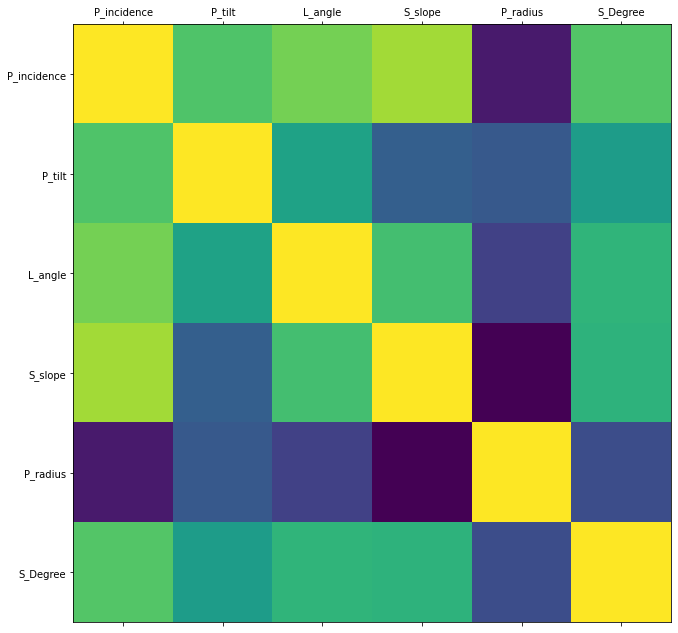

In [45]:
# Calling function plot_corr

plot_corr(df_new)

Text(0.5, 1.0, 'Correlation Matrix of Data')

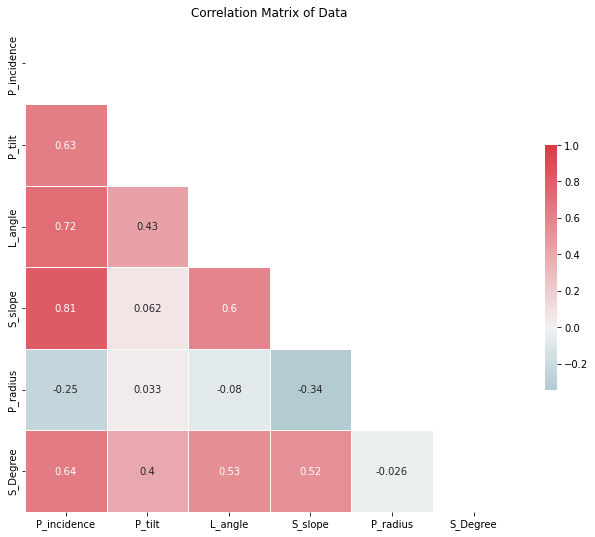

In [46]:
# HeatMap to understand Correlation between all features

corr = df_new.corr()  
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix of Data')

In [47]:
# b. Share insights on correlation. [2 Marks]
#    i. Features having stronger correlation with correlation value.
#      Filter for  greater correlation 

sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.5) & (sort < 1)]

P_incidence  S_slope        0.814960
S_slope      P_incidence    0.814960
L_angle      P_incidence    0.717282
P_incidence  L_angle        0.717282
S_Degree     P_incidence    0.638743
P_incidence  S_Degree       0.638743
P_tilt       P_incidence    0.629199
P_incidence  P_tilt         0.629199
S_slope      L_angle        0.598387
L_angle      S_slope        0.598387
S_Degree     L_angle        0.533667
L_angle      S_Degree       0.533667
S_Degree     S_slope        0.523557
S_slope      S_Degree       0.523557
dtype: float64

In [48]:
#    ii. Features having weaker correlation with correlation value.

sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort < 0.5) & (sort < 1)]

P_tilt       L_angle        0.432764
L_angle      P_tilt         0.432764
S_Degree     P_tilt         0.397862
P_tilt       S_Degree       0.397862
P_radius     S_slope        0.342128
S_slope      P_radius       0.342128
P_radius     P_incidence    0.247467
P_incidence  P_radius       0.247467
L_angle      P_radius       0.080344
P_radius     L_angle        0.080344
S_slope      P_tilt         0.062345
P_tilt       S_slope        0.062345
P_radius     P_tilt         0.032668
P_tilt       P_radius       0.032668
P_radius     S_Degree       0.026065
S_Degree     P_radius       0.026065
dtype: float64

In [49]:
# Distribution of Biomechanics features of the patient

file = df_new

In [50]:
file.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [51]:
file.columns = ['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree','Class']

In [52]:
file.describe()


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


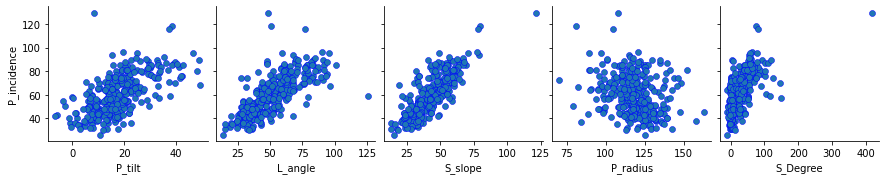

In [53]:
# c.Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]

sns.pairplot(file,y_vars='P_incidence',x_vars=["P_tilt","L_angle","S_slope","P_radius","S_Degree"],diag_kind = 'kde', plot_kws = {'edgecolor': 'b'})

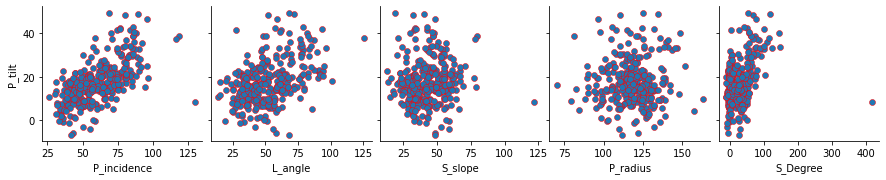

In [54]:
sns.pairplot(file,y_vars="P_tilt",x_vars=["P_incidence","L_angle","S_slope","P_radius","S_Degree"],diag_kind = 'kde', plot_kws = {'edgecolor': 'r'})

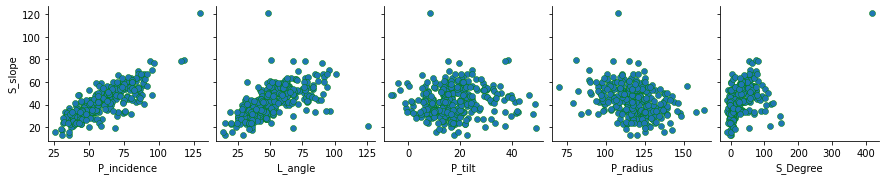

In [55]:
sns.pairplot(file,y_vars="S_slope",x_vars=["P_incidence","L_angle","P_tilt","P_radius","S_Degree"],diag_kind = 'kde', plot_kws = {'edgecolor': 'g'})

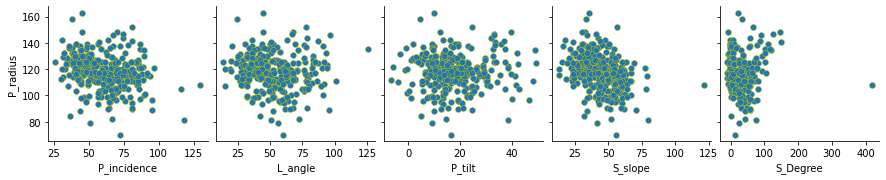

In [56]:
sns.pairplot(file,y_vars="P_radius",x_vars=["P_incidence","L_angle","P_tilt","S_slope","S_Degree"],diag_kind = 'kde', plot_kws = {'edgecolor': 'y'})

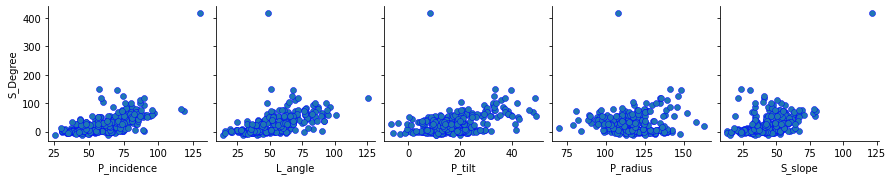

In [57]:
sns.pairplot(file,y_vars="S_Degree",x_vars=["P_incidence","L_angle","P_tilt","P_radius","S_slope"],diag_kind = 'kde', plot_kws = {'edgecolor': 'b'})

From above pairplot we can conclude that the value of P_radius > P_incidence . Value of P_incidence > L_angle and P_tilt. And S_Slope is smallest value that all the other parameters.

ValueError: cannot reindex from a duplicate axis

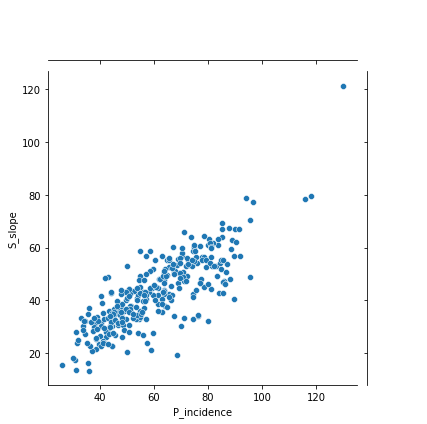

In [60]:
# d. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]


sns.jointplot(data=file, x="P_incidence",y="S_slope")

From above Joint point of P_incidence and S_slope we can conclude that both are directly propertional to each other. As value of P_incidence increases the S_slope also increases. And P_incidence decreases then S_slope will also decrease by same propertion.

c:\users\vrushali\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\vrushali\appdata\local\programs\python\python39\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\users\vrushali\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\vrushali\appdata\local\programs\python\python39\lib\site

<AxesSubplot:title={'center':'S_Degree'}, xlabel='S_Degree'>

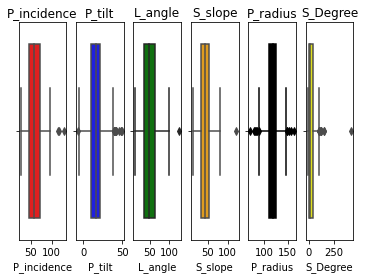

In [61]:
# e. Visualize a boxplot to check distribution of the features and share insights. [2 Marks]
plt.subplot(1,6,1)
plt.title('P_incidence')
sns.boxplot(file['P_incidence'],orient='vertical',color='red')

plt.subplot(1,6,2)
plt.title('P_tilt')
sns.boxplot(file['P_tilt'],orient='vertical',color='blue')

plt.subplot(1,6,3)
plt.title('L_angle')
sns.boxplot(file['L_angle'],orient='vertical',color='green')

plt.subplot(1,6,4)
plt.title('S_slope')
sns.boxplot(file['S_slope'],orient='vertical',color='orange')

plt.subplot(1,6,5)
plt.title('P_radius')
sns.boxplot(file['P_radius'],orient='vertical',color='black')

plt.subplot(1,6,6)
plt.title('S_Degree')
sns.boxplot(file['S_Degree'],orient='vertical',color='yellow')

From graph we can conclude that for S_Degree, S_slope and P_tilt the distibution is between 0 to less than 50. but for P_incidence and L_angle the distibution is between 50 to less than 100. For the P_radius the distribution is between 100 to 150.

# Question 4. Model Building: [ 6 Marks]

#    a. Split data into X and Y. [1 Marks]
#    b. Split data into train and test with 80:20 proportion. [1 Marks]
#    c. Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]
#    d. Print all the possible classification metrics for both train and test data. [2 Marks]


In [62]:
# using df_new which is concatination of all 3 dataframe

df_new.shape

(310, 7)

In [63]:
df_new.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [64]:
df_new['Class'] = df_new.Class.astype('category')

In [65]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [66]:
df_new.groupby(["Class"]).count()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
Normal,100,100,100,100,100,100
Type_H,60,60,60,60,60,60
Type_S,133,133,133,133,133,133
tp_s,17,17,17,17,17,17


In [67]:
part1_df_new = df_new.replace(to_replace ="tp_s",value ="Type_S")

In [68]:
part1_df_new.groupby(["Class"]).count()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
Normal,100,100,100,100,100,100
Type_H,60,60,60,60,60,60
Type_S,150,150,150,150,150,150


In [69]:
# The first column is id column which is P_incidence and nothing to do with it. So drop it.

part1_df_new = part1_df_new.drop(labels = "P_incidence", axis = 1)

In [70]:
part1_df_new.shape

(310, 6)

In [71]:
# a. Split data into X and Y. [1 Marks]

X = part1_df_new.drop(labels= "Class" , axis = 1)
y = part1_df_new["Class"]
X.head()

,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,16.964297,35.112814,21.540976,127.632875,7.986683
1,18.968430,51.601455,35.952428,125.846646,2.001642
2,8.945435,46.902096,35.417055,129.220682,4.994195
3,17.452121,48.000000,30.866809,128.980308,-0.910941
4,10.659859,42.577846,35.041929,130.178314,-3.388910


In [72]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()


,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,2.292073e-16,1.833659e-16,-1.833659e-16,-6.876220e-16,-4.584147e-17
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


In [73]:
# Split X and y into training and test set in 80:20 ratio
# b. Split data into train and test with 80:20 proportion. [1 Marks]

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.20, random_state=1)

In [74]:
# Build KNN Model
# c. Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]

NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH

KNeighborsClassifier(weights='distance')

In [75]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [76]:
# Evaluate Performance of kNN Model
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

# d. Print all the possible classification metrics for both train and test data. [2 Marks]

predicted_labels = NNH.predict(X_test)


c:\users\vrushali\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [77]:
NNH.score(X_test, y_test)


c:\users\vrushali\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.7580645161290323

Confusion Matrix


<AxesSubplot:>

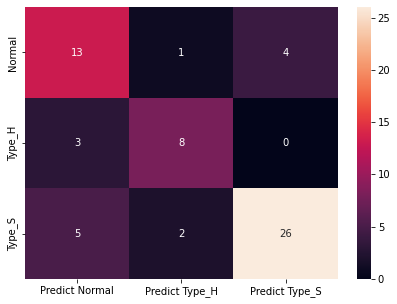

In [78]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["Normal", "Type_H","Type_S"])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal", "Type_H","Type_S"]],
                  columns = [i for i in ["Predict Normal","Predict Type_H","Predict Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# Question 5. Performance Improvement:[ 4 Marks]
#    a. Tune the parameters/hyperparameters to improve the performance of the base model. [2 Marks]
#    b. Clearly showcase improvement in performance achieved. [1 Marks]
#    For Example:
#       i. Accuracy: +15% improvement
#      ii. Precision: +10% improvement.
#    c. Clearly state which parameters contributed most to improve model performance.
#        What could be the probable reason? [1 Marks]

In [82]:
# a. Tune the parameters/hyperparameters to improve the performance of the base model. [2 Marks]


model = LogisticRegression(solver="liblinear")

In [86]:
#Training the model.

model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [87]:
#Predict test data set.
y_pred = model.predict(X_test)

In [88]:
#Checking performance our model with classification report.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       0.75      0.83      0.79        18
      Type_H       0.80      0.73      0.76        11
      Type_S       0.97      0.94      0.95        33

    accuracy                           0.87        62
   macro avg       0.84      0.83      0.84        62
weighted avg       0.88      0.87      0.87        62



In [89]:
#Checking performance our model with ROC Score.

roc_auc_score(y_test, y_pred)

ValueError: could not convert string to float: 'Normal'

#  PART TWO
# 1. Data Understanding and Preparation: [5 Marks]
#     a. Read both the andDatasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate
#        variables. [1 Mark]
#     b. Print shape and Column Names and DataTypes of both the Dataframes. [1 Mark]
#     c. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks]
#     d. Change Datatype of below features to ‘Object’ [1 Mark]
#        ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.
#        [Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But
#        DataType is ‘int’/’float’ which is not expected.]


In [5]:
# a. Read both the andDatasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Mark]

part2data1 = pd.read_csv('Data1.csv')
part2data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [6]:
part2data2 = pd.read_csv('Data2.csv')
part2data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [7]:
# printing columns, non-null count and datatype of each columns  of both dataframes

part2data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [8]:
part2data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


In [9]:
#b. Print shape and Column Names and DataTypes of both the Dataframes. [1 Mark]

#  i) printing the columns of data1
for col in part2data1.columns:
    print(col)

ID
Age
CustomerSince
HighestSpend
ZipCode
HiddenScore
MonthlyAverageSpend
Level


In [10]:
for col in part2data2.columns:
    print(col)

ID
Mortgage
Security
FixedDepositAccount
InternetBanking
CreditCard
LoanOnCard


In [11]:
# ii) Printing shape of both dataframes

part2data1.shape

(5000, 8)

In [12]:
part2data2.shape

(5000, 7)

In [13]:
# iii) Now printing datatypes of both datframes

part2data1.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

In [14]:
part2data2.dtypes

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [15]:
part2data1.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000


In [16]:
part2data2.describe()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,4980.000000
mean,2500.500000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096386
std,1443.520003,101.713802,0.305809,0.23825,0.490589,0.455637,0.295149
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [17]:
# c. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks]

part2df1 = pd.DataFrame(part2data1)
part2df2 = pd.DataFrame(part2data2)
part2_new_df = pd.merge(part2df1,part2df2, on='ID')
part2_new_df.shape

(5000, 14)

In [18]:
part2_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [19]:
part2_new_df.shape

(5000, 14)

In [20]:
part2_new_df.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,4980.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096386
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.295149
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [21]:
part2_new_df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [22]:
# d. Change Datatype of below features to ‘Object’ [1 Mark]
#    ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.


part2_changeDatatype_df = part2_new_df.astype({"CreditCard": object, "InternetBanking": object, "FixedDepositAccount": object, "Security": object, "Level": object, "HiddenScore": object})

part2_changeDatatype_df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

# 2. Data Exploration and Analysis: [5 Marks]
#    a. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]
#    b. Check the percentage of missing values and impute if required. [1 Mark]
#    c. Check for unexpected values in each categorical variable and impute with best suitable value.
#    [Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected
#    values which needs treatment ] [2 Marks]

In [23]:
# a. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]

part2_changeDatatype_df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [24]:
part2_changeDatatype_df[part2_changeDatatype_df['LoanOnCard'].isnull()]

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,NaN
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,NaN
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,NaN
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,NaN
79,80,50,26,19,94720,2,0.4,1,118,0,0,1,0,NaN


In [25]:
part2_changeDatatype_df['LoanOnCard'].dropna(inplace=True)

In [26]:
part2_changeDatatype_df[part2_changeDatatype_df['LoanOnCard'].isnull()]

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,NaN
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,NaN
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,NaN
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,NaN
79,80,50,26,19,94720,2,0.4,1,118,0,0,1,0,NaN


c:\users\vrushali\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanOnCard', ylabel='Density'>

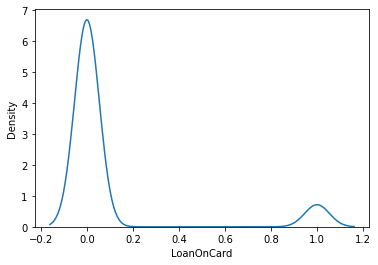

In [27]:
sns.distplot(part2_changeDatatype_df['LoanOnCard'],hist = False)

c:\users\vrushali\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanOnCard', ylabel='Density'>

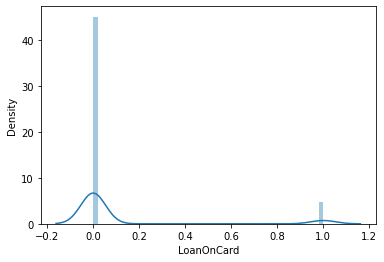

In [28]:
sns.distplot(part2_changeDatatype_df['LoanOnCard'],hist = True)

LoanOnCard column has 20 missing values. 

In [29]:
# b. Check the percentage of missing values and impute if required. [1Mark]

part2_percent_missing = part2_changeDatatype_df.isnull().sum() * 100 / len(part2_changeDatatype_df)

part2_percent_missing

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

In [30]:
# Replace null values of LoanOnCard column by '0'

part2_changeDatatype_df = part2_changeDatatype_df.fillna('0')

In [31]:
# Missing value of LoanOnCard Columns filled with 0's so now no missing values 

part2_changeDatatype_df.isnull().sum()


ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [32]:
# c. Check for unexpected values in each categorical variable and impute with best suitable value.
#     [Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected
#     values which needs treatment ] [2 Marks]


part2_changeDatatype_df.describe(include='all').loc['unique', :]



ID                     NaN
Age                    NaN
CustomerSince          NaN
HighestSpend           NaN
ZipCode                NaN
HiddenScore            NaN
MonthlyAverageSpend    NaN
Level                  NaN
Mortgage               NaN
Security               NaN
FixedDepositAccount    NaN
InternetBanking        NaN
CreditCard             NaN
LoanOnCard             3.0
Name: unique, dtype: float64

In [120]:
for LoanOnCard in part2_changeDatatype_df:
    print(part2_changeDatatype_df[LoanOnCard].unique())

[   1    2    3 ... 4998 4999 5000]
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]
[91107 90089 94720 94112

In [33]:
part2_changeDatatype_df["LoanOnCard"].replace({"0": 0, "1.0": 1, "0.0": 0}, inplace=True)

In [122]:
# Now we will get no any unexpected value of categorical column LoanOnCard 
for LoanOnCard in part2_changeDatatype_df:
    print(part2_changeDatatype_df[LoanOnCard].unique())

[   1    2    3 ... 4998 4999 5000]
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]
[91107 90089 94720 94112

# Question 3. Data Preparation and model building: 10
#    a. Split data into X and Y. [1 Mark]
#     [Recommended to drop ID & ZipCode. LoanOnCard is target Variable]
#    b. Split data into train and test. Keep 25% data reserved for testing. [1 Mark]
#    c. Train a Supervised Learning Classification base model - Logistic Regression. [2 Mark]
#    d. Print evaluation metrics for the model and clearly share insights. [1 Mark]
#    e. Balance the data using the right balancing technique. [2 Mark]
#    f. Again train the same previous model on balanced data. [1 Mark]
#    g. Print evaluation metrics and clearly share differences observed. [2 Mark]

In [34]:
# a. Split data into X and Y. [1 Mark]
# [Recommended to drop ID & ZipCode. LoanOnCard is target Variable]

# Removing ID Column of part2_changeDatatype_df

part2_drop_df = part2_changeDatatype_df.drop('ID',axis=1) 

In [35]:
part2_drop_df.shape

(5000, 13)

In [36]:
part2_drop_df.head()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [37]:
part2_drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   ZipCode              5000 non-null   int64  
 4   HiddenScore          5000 non-null   int64  
 5   MonthlyAverageSpend  5000 non-null   float64
 6   Level                5000 non-null   int64  
 7   Mortgage             5000 non-null   int64  
 8   Security             5000 non-null   int64  
 9   FixedDepositAccount  5000 non-null   int64  
 10  InternetBanking      5000 non-null   int64  
 11  CreditCard           5000 non-null   int64  
 12  LoanOnCard           5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [38]:
# Removing ZipCode column
part2_drop_df1 = part2_drop_df.drop('ZipCode',axis=1)

In [39]:
part2_drop_df1.shape

(5000, 12)

In [40]:
part2_drop_df1.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0


In [41]:
part2_drop_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   HiddenScore          5000 non-null   int64  
 4   MonthlyAverageSpend  5000 non-null   float64
 5   Level                5000 non-null   int64  
 6   Mortgage             5000 non-null   int64  
 7   Security             5000 non-null   int64  
 8   FixedDepositAccount  5000 non-null   int64  
 9   InternetBanking      5000 non-null   int64  
 10  CreditCard           5000 non-null   int64  
 11  LoanOnCard           5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 507.8 KB


In [42]:
# checking of  null  values in dataset

part2_drop_df1.isnull().values.any() 

False

c:\users\vrushali\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


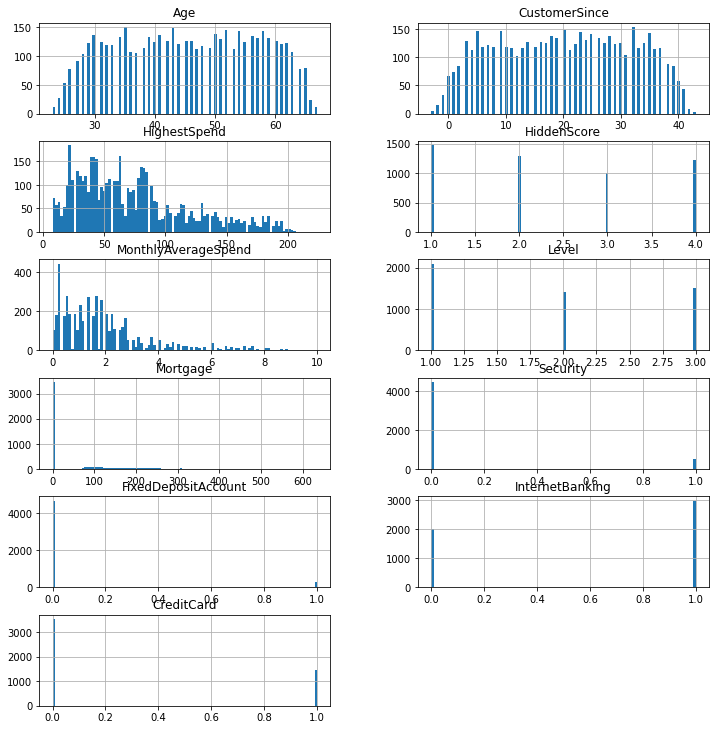

In [43]:
# Drawing histogram of each column. 

columns = list(part2_drop_df1)[0:-1] # Excluding Outcome column which has only 
part2_drop_df1[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

In [44]:
# using get_dummies method to convert categorical data into dummy/indicator variables.

part2_drop_df1['Age'] = pd.get_dummies(part2_drop_df1['Age'])
part2_drop_df1['CustomerSince'] = pd.get_dummies(part2_drop_df1['CustomerSince'])
part2_drop_df1['HighestSpend'] = pd.get_dummies(part2_drop_df1['HighestSpend'])
part2_drop_df1['HiddenScore'] = pd.get_dummies(part2_drop_df1['HiddenScore'])
part2_drop_df1['MonthlyAverageSpend'] = pd.get_dummies(part2_drop_df1['MonthlyAverageSpend'])
part2_drop_df1['Level'] = pd.get_dummies(part2_drop_df1['Level'])
part2_drop_df1['Mortgage'] = pd.get_dummies(part2_drop_df1['Mortgage'])
part2_drop_df1['Security'] = pd.get_dummies(part2_drop_df1['Security'])
part2_drop_df1['FixedDepositAccount'] = pd.get_dummies(part2_drop_df1['FixedDepositAccount'])
part2_drop_df1['InternetBanking'] = pd.get_dummies(part2_drop_df1['InternetBanking'])
part2_drop_df1['CreditCard'] = pd.get_dummies(part2_drop_df1['CreditCard'])

In [45]:
# correlation matrix

part2_drop_df1.corr()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
Age,1.000000,0.287750,-0.003334,-0.022714,-0.007219,0.016315,-0.011592,-0.009988,0.012436,-0.006986,-0.013206,-0.015984
CustomerSince,0.287750,1.000000,-0.001924,-0.018277,-0.004164,-0.009703,0.003532,0.009661,0.007174,-0.008837,0.018260,-0.009221
HighestSpend,-0.003334,-0.001924,1.000000,0.001484,-0.010005,-0.015823,0.000479,-0.005788,0.017236,0.010402,-0.001544,-0.022153
HiddenScore,-0.022714,-0.018277,0.001484,1.000000,0.014603,0.054193,0.018815,0.016757,0.010884,-0.004035,0.021930,-0.051110
MonthlyAverageSpend,-0.007219,-0.004164,-0.010005,0.014603,1.000000,0.046610,0.010847,0.000301,0.025658,-0.004923,0.009642,-0.043246
Level,0.016315,-0.009703,-0.015823,0.054193,0.046610,1.000000,-0.002872,-0.006863,0.014630,-0.003394,-0.014925,-0.148894
Mortgage,-0.011592,0.003532,0.000479,0.018815,0.010847,-0.002872,1.000000,-0.002221,0.040212,-0.004310,-0.004920,-0.029940
Security,-0.009988,0.009661,-0.005788,0.016757,0.000301,-0.006863,-0.002221,1.000000,0.317034,0.012627,-0.015028,-0.021954
FixedDepositAccount,0.012436,0.007174,0.017236,0.010884,0.025658,0.014630,0.040212,0.317034,1.000000,0.175880,0.278644,-0.316355
InternetBanking,-0.006986,-0.008837,0.010402,-0.004035,-0.004923,-0.003394,-0.004310,0.012627,0.175880,1.000000,0.004210,-0.006278


In [46]:
# However we want to see correlation in graphical representation so below is function for that

def plot_corr(df, size=11):
    corr = part2_drop_df1.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

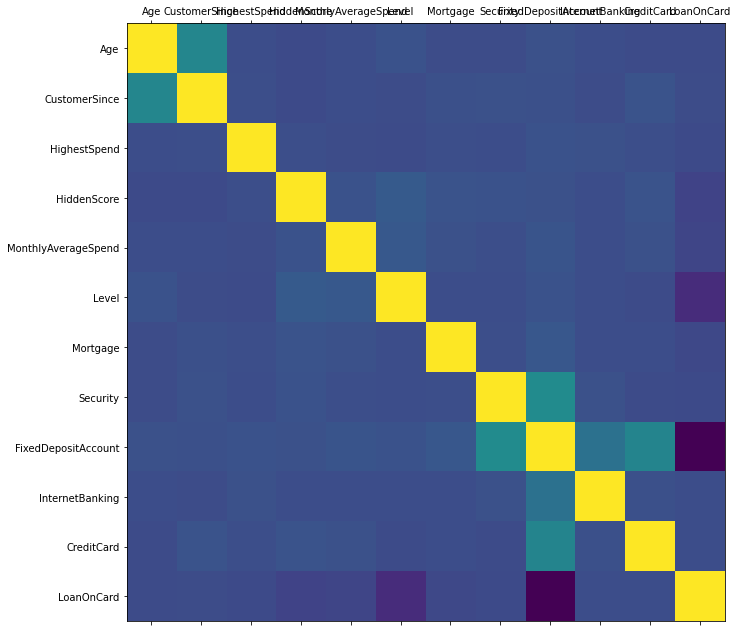

In [47]:
# Calling above mentioned function plot_corr
plot_corr(part2_drop_df1)

In [48]:
# Now spliting data using LoanOnCard as Target Variable

# a. Split data into X and Y. [1 Mark]
#      Already we have dropped ID & ZipCode. using LoanOnCard as a target Variable for splitting data

X = part2_drop_df1.drop('LoanOnCard',axis=1)
y = part2_drop_df1['LoanOnCard']

In [49]:
X.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,0,0,0,0,0,1,1,0,1,1,1
1,0,0,0,0,0,1,1,0,1,1,1
2,0,0,0,1,0,1,1,1,1,1,1
3,0,0,0,1,0,0,1,1,1,1,1
4,0,0,0,0,0,0,1,1,1,1,0


In [50]:
# b. Split data into train and test. Keep 25% data reserved for testing. [1 Mark]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)

In [51]:
X_train.isnull().sum()

Age                    0
CustomerSince          0
HighestSpend           0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
dtype: int64

In [52]:
logisticReg = LogisticRegression()

In [53]:
# c. Train a Supervised Learning Classification base model - Logistic Regression. [2 Mark]

lg = logisticReg.fit(X_train,y_train)

In [54]:
logisticReg.score(X_test,y_test)

0.9056

In [55]:
# Calculating coefficient and intercept

b1 = logisticReg.coef_
b0 = logisticReg.intercept_

b0
b1

array([[-0.32521779, -0.30146814, -0.64690404, -0.40686532, -1.07765205,
        -1.2289398 , -0.12614532,  1.28002534, -3.66944513,  0.39256751,
         0.9658093 ]])

In [56]:
y_pred = logisticReg.predict(X_test)

In [57]:
y_score = logisticReg.predict_proba(X_test)

In [58]:
y_score

array([[0.94818034, 0.05181966],
       [0.98275887, 0.01724113],
       [0.94730925, 0.05269075],
       ...,
       [0.87288017, 0.12711983],
       [0.88623159, 0.11376841],
       [0.98590253, 0.01409747]])

In [59]:
print(pd.DataFrame(confusion_matrix(y_test,y_pred,labels = [0,1]), index = ['true:no','true:yes'],columns = ['pred:no','pred:yes']))

          pred:no  pred:yes
true:no      1110        11
true:yes      107        22


In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1121
           1       0.67      0.17      0.27       129

    accuracy                           0.91      1250
   macro avg       0.79      0.58      0.61      1250
weighted avg       0.89      0.91      0.88      1250



In [61]:
# d. Print evaluation metrics for the model and clearly share insights. [1 Mark]

confusion_matrix(y_test,y_pred)

array([[1110,   11],
       [ 107,   22]], dtype=int64)

In [62]:
auc = roc_auc_score(y_test,y_pred)

In [63]:
auc

0.5803649841987706

 As accuracy of our model is very less. Our model is just 58% accuracte. 
 So now we again we resplit the data set . We are keeping 30 % of data for testing.

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)

In [65]:
X_train.isnull().sum()

Age                    0
CustomerSince          0
HighestSpend           0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
dtype: int64

In [66]:
logisticReg1 = LogisticRegression()

In [67]:
lg1 = logisticReg1.fit(X_train,y_train)

In [68]:
logisticReg1.score(X_test,y_test)

0.908

In [69]:
b11 = logisticReg1.coef_
b01 = logisticReg1.intercept_

b11
b01

array([-0.50308179])

In [70]:
y_pred1 = logisticReg1.predict(X_test)

In [71]:
y_score1 = logisticReg1.predict_proba(X_test)

In [72]:
y_score1

array([[0.95549936, 0.04450064],
       [0.98181054, 0.01818946],
       [0.94224509, 0.05775491],
       ...,
       [0.82264062, 0.17735938],
       [0.8854743 , 0.1145257 ],
       [0.97281989, 0.02718011]])

In [73]:
print(pd.DataFrame(confusion_matrix(y_test,y_pred1,labels = [0,1]), index = ['true:no','true:yes'],columns = ['pred:no','pred:yes']))

          pred:no  pred:yes
true:no      1338        13
true:yes      125        24


In [74]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1351
           1       0.65      0.16      0.26       149

    accuracy                           0.91      1500
   macro avg       0.78      0.58      0.60      1500
weighted avg       0.89      0.91      0.88      1500



In [75]:
confusion_matrix(y_test,y_pred1)

array([[1338,   13],
       [ 125,   24]], dtype=int64)

In [76]:
auc1 = roc_auc_score(y_test,y_pred1)

In [77]:
auc1

0.5757256618264374

Still we are getting 57% accuracy. Even I have splitted the data set for 20% and 40 % also. But still it's accuracy is 
less than 60 % so we need to balance the dataset.


In [78]:
#e. Balance the data using the right balancing technique. [2 Mark]

#  balance data by using reset_index 

df = pd.DataFrame(part2_drop_df1)
g = df.groupby('LoanOnCard')
df_balance = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))


In [79]:
df_balance.shape

(960, 12)

In [80]:
df_balance.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 960 entries, (0, 0) to (1, 479)
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  960 non-null    uint8
 1   CustomerSince        960 non-null    uint8
 2   HighestSpend         960 non-null    uint8
 3   HiddenScore          960 non-null    uint8
 4   MonthlyAverageSpend  960 non-null    uint8
 5   Level                960 non-null    uint8
 6   Mortgage             960 non-null    uint8
 7   Security             960 non-null    uint8
 8   FixedDepositAccount  960 non-null    uint8
 9   InternetBanking      960 non-null    uint8
 10  CreditCard           960 non-null    uint8
 11  LoanOnCard           960 non-null    int64
dtypes: int64(1), uint8(11)
memory usage: 20.9 KB


In [81]:
# Again reassigning values x ,y to the latest balanced dataframe

X = df_balance.drop('LoanOnCard',axis=1)
y = df_balance['LoanOnCard']

In [82]:
# f. Again train the same previous model on balanced data. [1 Mark]

X_train,X_test,t_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)

In [83]:
X_train.isnull().sum()

Age                    0
CustomerSince          0
HighestSpend           0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
dtype: int64

In [84]:
logisticReg2 = LogisticRegression()

In [85]:
logisticReg2.fit(X_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [720, 3500]

# Question 4. Performance Improvement: [10 Marks]
#    a. Train a base model each for SVM, KNN. [4 Marks]
#    b. Tune parameters/hyperparameters for each of the models wherever required and finalize a model. [3 Mark]
#    c. Print evaluation metrics for final model. [1 Mark]
#    d. Share improvement achieved from base model to final model. [2 Mark]

In [184]:
# i)  Firstly we are training base model for SVM

# We are considering Dataframe before droping ID and ZIPCODE

part2_changeDatatype_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


In [185]:
part2_changeDatatype_df.isnull().values.any() 

False

In [186]:
part2_changeDatatype_df.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [190]:
part2_changeDatatype_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


In [191]:
part2_changeDatatype_df.shape

(5000, 14)

In [192]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x]== predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [193]:
# Spliting of data
X,y = np.array(part2_new_df)[ :, 1:14], np.array(part2_changeDatatype_df.ID)[:]  # note for y, extracting all rows of ID Column

In [194]:
# We are splitting it by 70-30
X_train = X[:3749, :]
X_test = X[3750: , :]
y_train = y[:3749]
y_test = y[3750:]

In [195]:
# Model Building 

clf = svm.SVC(gamma=0.025, C=3)  

In [196]:
clf

SVC(C=3, gamma=0.025)

gamma is a measure of influence of a data point. It is inverse of distance of influence. C is penalty of wrong classifications.


In [197]:
clf.fit(X_train , y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [198]:
# Checking for infinity values of X_train as y_Train
# we are getting error ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
#while fitting data by clf.fit(X_train , y_train)
#  to check whether value is finite or not, and not whether the return value of the any function is a number
np.all(np.isfinite(X_train))


False

In [199]:
np.all(np.isfinite(y_train))

True

In [200]:
# Chceking whether value is Not a Number
np.any(np.isnan(y_train))

False

In [201]:
np.any(np.isnan(X_train))

True

In [202]:
# Checking value of X_train 
import math
math.isinf(X_train)

TypeError: only size-1 arrays can be converted to Python scalars

In [203]:
math.isinf(y_train)

TypeError: only size-1 arrays can be converted to Python scalars

In [204]:
#  a. Train a base model each for  KNN. [4 Marks]

# using data set of before droping ID and zipcode

part2_changeDatatype_df.shape

(5000, 14)

In [205]:
part2_changeDatatype_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


In [206]:
part2_changeDatatype_df['LoanOnCard'] = part2_changeDatatype_df.LoanOnCard.astype('category')

In [207]:
part2_changeDatatype_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [208]:
# Class distribution among 0 and 1 is almost 9:1. The model will better predict 0 and 1
part2_changeDatatype_df.groupby(["LoanOnCard"]).count()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
LoanOnCard,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


Drop the first column from the data frame. This is Id column which is not used in modeling

In [209]:
# The first column is id column which is customer  and nothing to do with the model attriibutes. So drop it.

part2_changeDatatype_df = part2_changeDatatype_df.drop(labels = "ID", axis = 1)

In [210]:
part2_changeDatatype_df.shape

(5000, 13)

In [211]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = part2_changeDatatype_df.drop(labels= "LoanOnCard" , axis = 1)
y = part2_changeDatatype_df["LoanOnCard"]
X.head()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [213]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [214]:
# Build KNN Model

NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [215]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [216]:
# Evaluate Performance of kNN Model

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

c:\users\vrushali\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\vrushali\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.892

In [217]:
predicted_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Confusion Matrix


<AxesSubplot:>

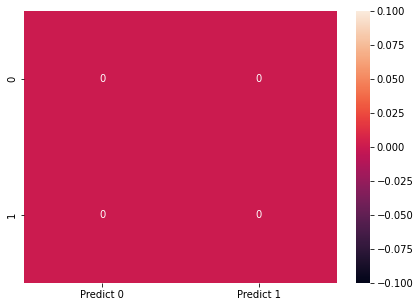

In [218]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["0", "1"])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In many applications, however, the supply of data for training and testing will be limited, and in order to build good models, we wish to use as much of the available data as possible for training. However, if the validation set is small, it will give a relatively noisy estimate of predictive performance.Probably the simplest and most widely used method for estimating prediction error is cross-validation.So in order to achieve imporvement ifrom base model to final model we should use cross-validation techinique.
If we need improvement in base model so for that model selection is also important. Model selection is the process of choosing one among many candidate models for a predictive modeling problem.There may be many competing concerns when performing model selection beyond model performance, such as complexity, maintainability, and available resources.

In [219]:
logisticReg = LogisticRegression()

In [222]:
#Predict test data set.

logisticReg.fit(X_train, y_train)


LogisticRegression()

In [225]:
y_pred = logisticReg.predict(X_test)

In [227]:
#Checking performance our model with classification report.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.30      0.39       149

    accuracy                           0.91      1500
   macro avg       0.75      0.64      0.67      1500
weighted avg       0.89      0.91      0.89      1500



In [228]:
#Checking performance our model with ROC Score.

roc_auc_score(y_test, y_pred)

0.6354378312857988

c:\users\vrushali\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

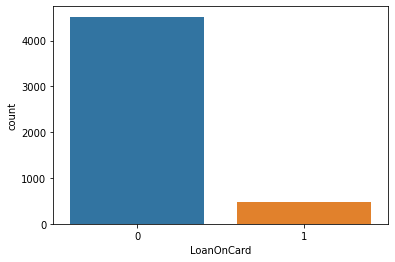

In [224]:
#Univariate analysis target Variable LoanOnCard.

sns.countplot(part2_changeDatatype_df['LoanOnCard'])